# EE 511 Project 2 Report


This is an all-in-one report to EE 511 Project 2, where the explanations, discussions and codes are included.

All experiments are run in Python code.


Import the libs we need in this project.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from scipy.special import comb
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
pi = np.pi
%matplotlib inline

import networkx as nx

Define the functions of rejection sampling, 0-1 uniform distribution and "Toss a coin" experiment.

In [2]:
def RejMethod(f,g,M,cts):
    '''
    |f/g| is bounded with M, and we expect c to be close to 1 and >1.
    f is the density function from which we want to generate rvs.
    Besides, density p is hard to generate.
    g is the density function whose samples are easy to generate. e.g Uniform Distribution's
    g must support f, that is g(x)>0 whenever f(x)>0
    
    Generate a Xcard from g, generate a U from Uniform(0,1)
    if U <= f(Xcard) / (M * g(Xcard)),then accept Xcard, otherwise repeat it.
    
    cts is the # of reservations.
    '''
    
    Xcard = np.zeros([cts])
    for i in range(cts):
        Xcard[i] = g()
    U = np.random.rand(cts)
    result = (U <= f(Xcard) / (M * g(Xcard))).astype('int32')
    return result

In [3]:
def Uniform01(x = 2):
    '''
    This is the g function we will use later
    '''
    if x < 0 or x > 1:
        return np.random.rand(1)
    else:
        return 1

In [4]:
def Toss(x):
    return 0.5

## Exp.1 [Networking Again]
--------------------------------------------

### Q1

For a network, the number of connections is binomial distribution with parameters $n=\frac{\text{50}\left( \text{50}-1 \right)}{2}$ and $p=0.02,0.09,0.12$. 

For a certain vertex, the probability of that it has at least one connection, or say that it has a non-zero degree is $P\left[ k>0 \right]=1-P\left[ k=0 \right]=1-\left( \begin{matrix}
   n-1  \\
   0  \\
\end{matrix} \right){{p}^{0}}{{\left( 1-p \right)}^{n-1}}=1-{{\left( 1-p \right)}^{n-1}}$. 

Let $n=50, p=0.02,0.09,0.12$ rescpectively, we get that $P\left[ k>0 \right]=62.84\%,99.02\%,99.81\%$. 

That is to say, it is highly likely to see that when $p=0.02$, the network is "sparse" because many vertices will has no single connection, while when $p=0.09,0.12$, the network seems "full", almost every vertex has connections.

The following three pictures support the argument above. Among these pictures, the color of vertices implies the number of edges adjacent to them. the deeper the color is, the bigger of the number is. 

We see that in the first picture, many poor vertices has no friend so that they are marginalized. Only several small groups exist. However in the following two pictures, all vertices form a big family, nearly every guy has a pal.


In [5]:
n = 50 # # of people
MaxC = n * (n - 1) / 2 # # of max connections

#---------initialize 3 graph----------
G = [nx.Graph() for i in range(3)]
for g in G:
    g.add_nodes_from(range(n))
#-------------------------------------

p = [lambda x: 0.02, lambda x: 0.09, lambda x: 0.12]

for i in range(n):
    for j in range(i+1,n,1):
        for k in range(3):
            if RejMethod(p[k],Uniform01,1,1) >= 0.99 :
                G[k].add_edge(i,j)

#statistic
degree = np.zeros([3,n])
for i in range(3):
    for j in range(n):
        degree[i,j] = G[i].degree[j]
# normalize degree into (0.2~1) 
# as the alphas of nodes
MaxD = np.max(degree,axis = 1)
MinD = np.min(degree,axis = 1)
alphas = (degree - MinD[:,None]) / (MaxD - MinD)[:,None] * 0.8 + 0.2



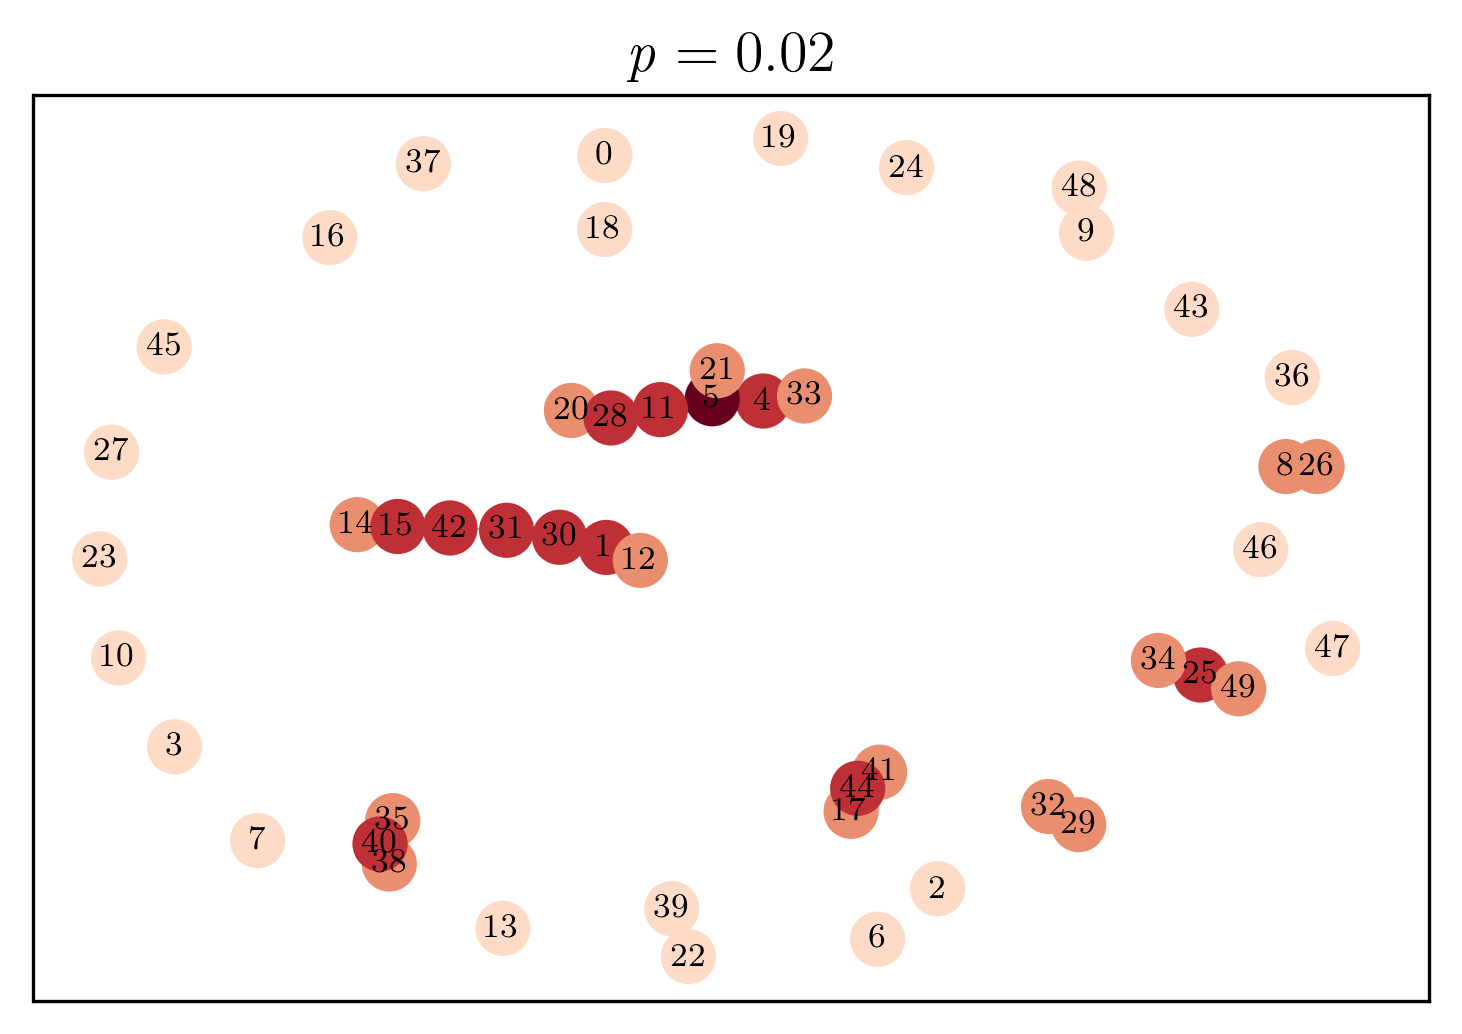

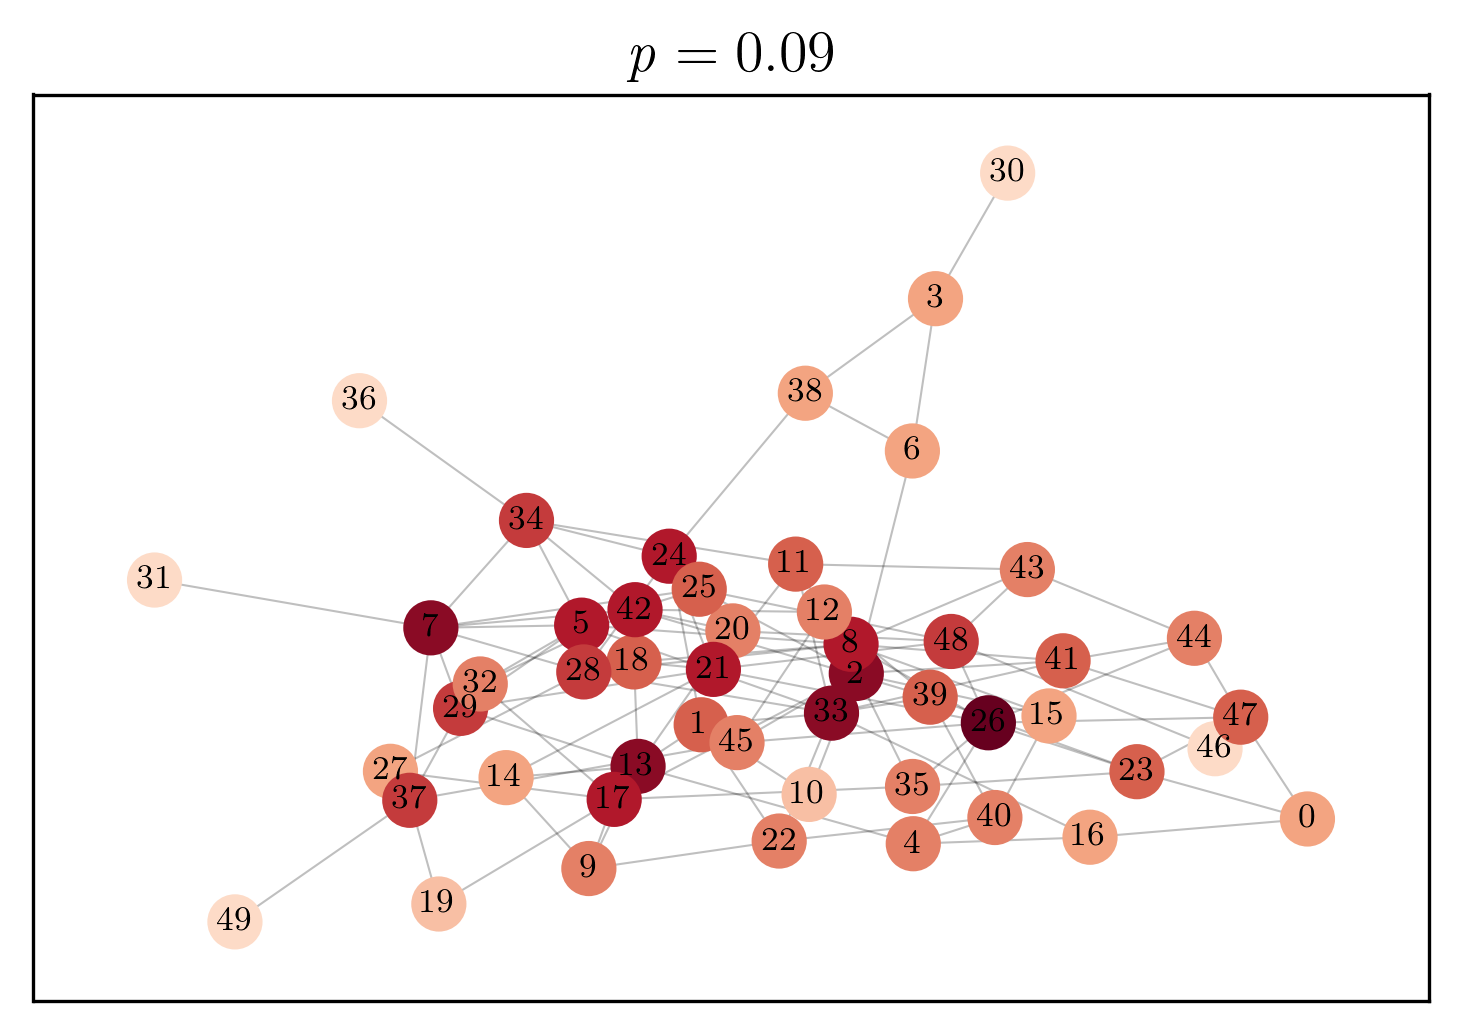

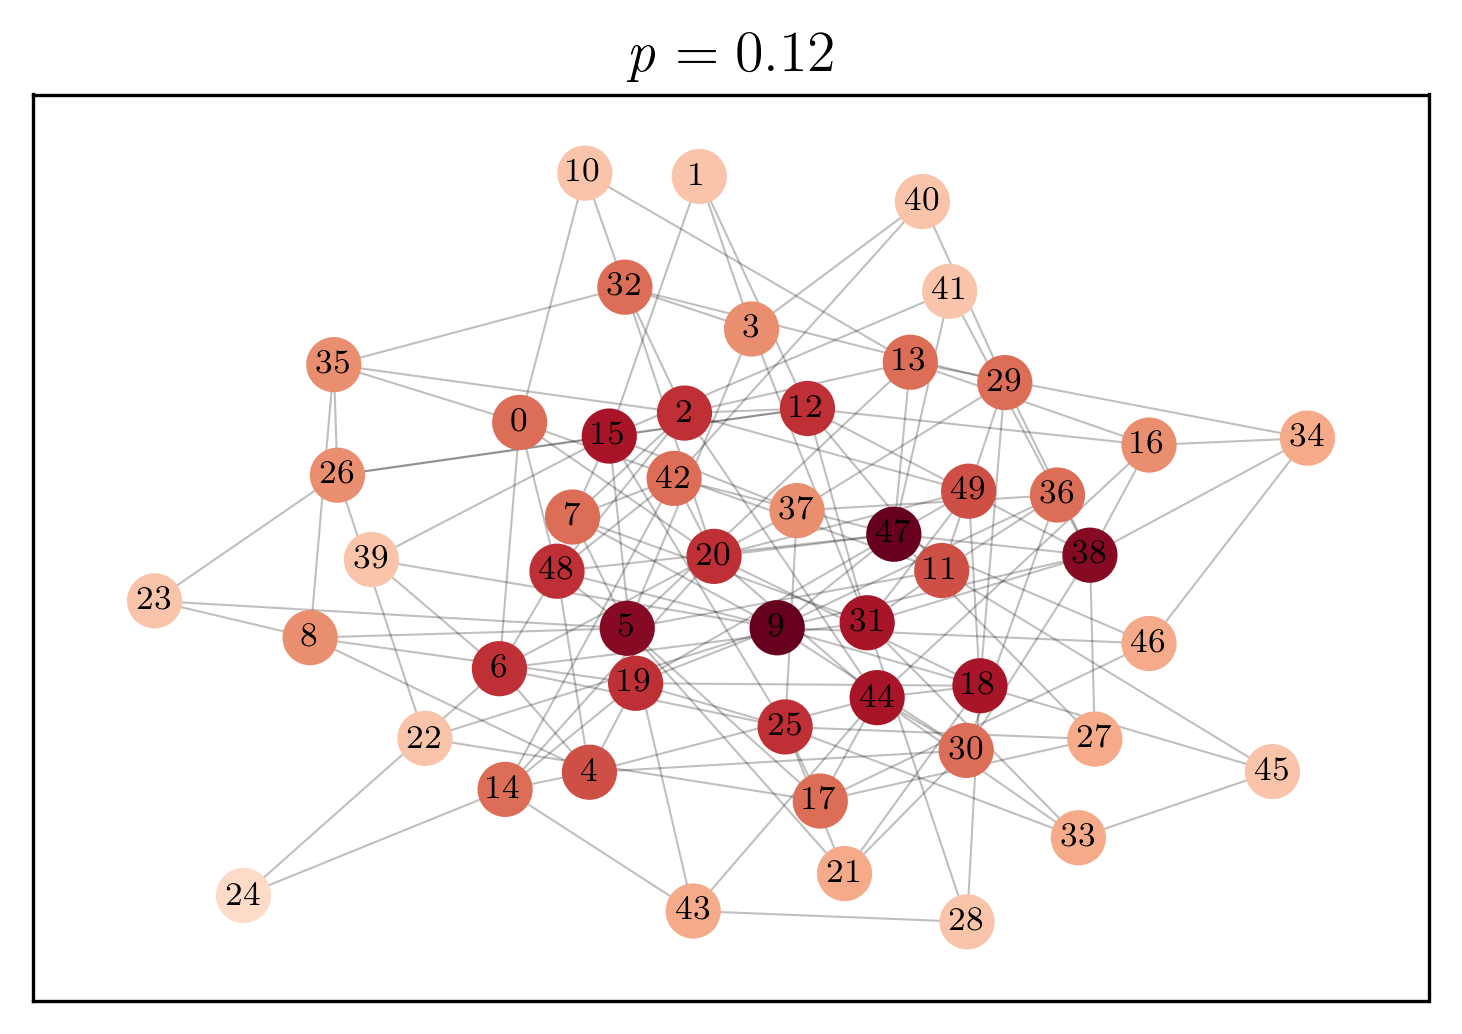

In [6]:
#Draw the graphs
for i in range(0,3,1):
    plt.figure(figsize = (6,4),dpi=300)
    pos=nx.spring_layout(G[i])
    nx.draw_networkx_nodes(G[i],node_size=150,pos=pos,node_color=alphas[i,:],\
                           vmin=-1, vmax=1, cmap='RdBu_r',\
                           label = '$\mathit{p}='+str(p[i](1))+'$')
    nx.draw_networkx_edges(G[i],pos=pos,width = 0.5, alpha = 0.25)
    nx.draw_networkx_labels(G[i],pos=pos,font_size=8)
    plt.xticks([])
    plt.yticks([])
    plt.title(r'$\mathit{p}='+str(p[i](1))+'$', fontsize=14)

### Q2

The degree of vertices is $b\left( n-1,p \right)$.

For $p=0.02,0.09,0.12$, their expectation is 0.98, 4.41, 5.88 respectively.

The following histograms support this conclusion.

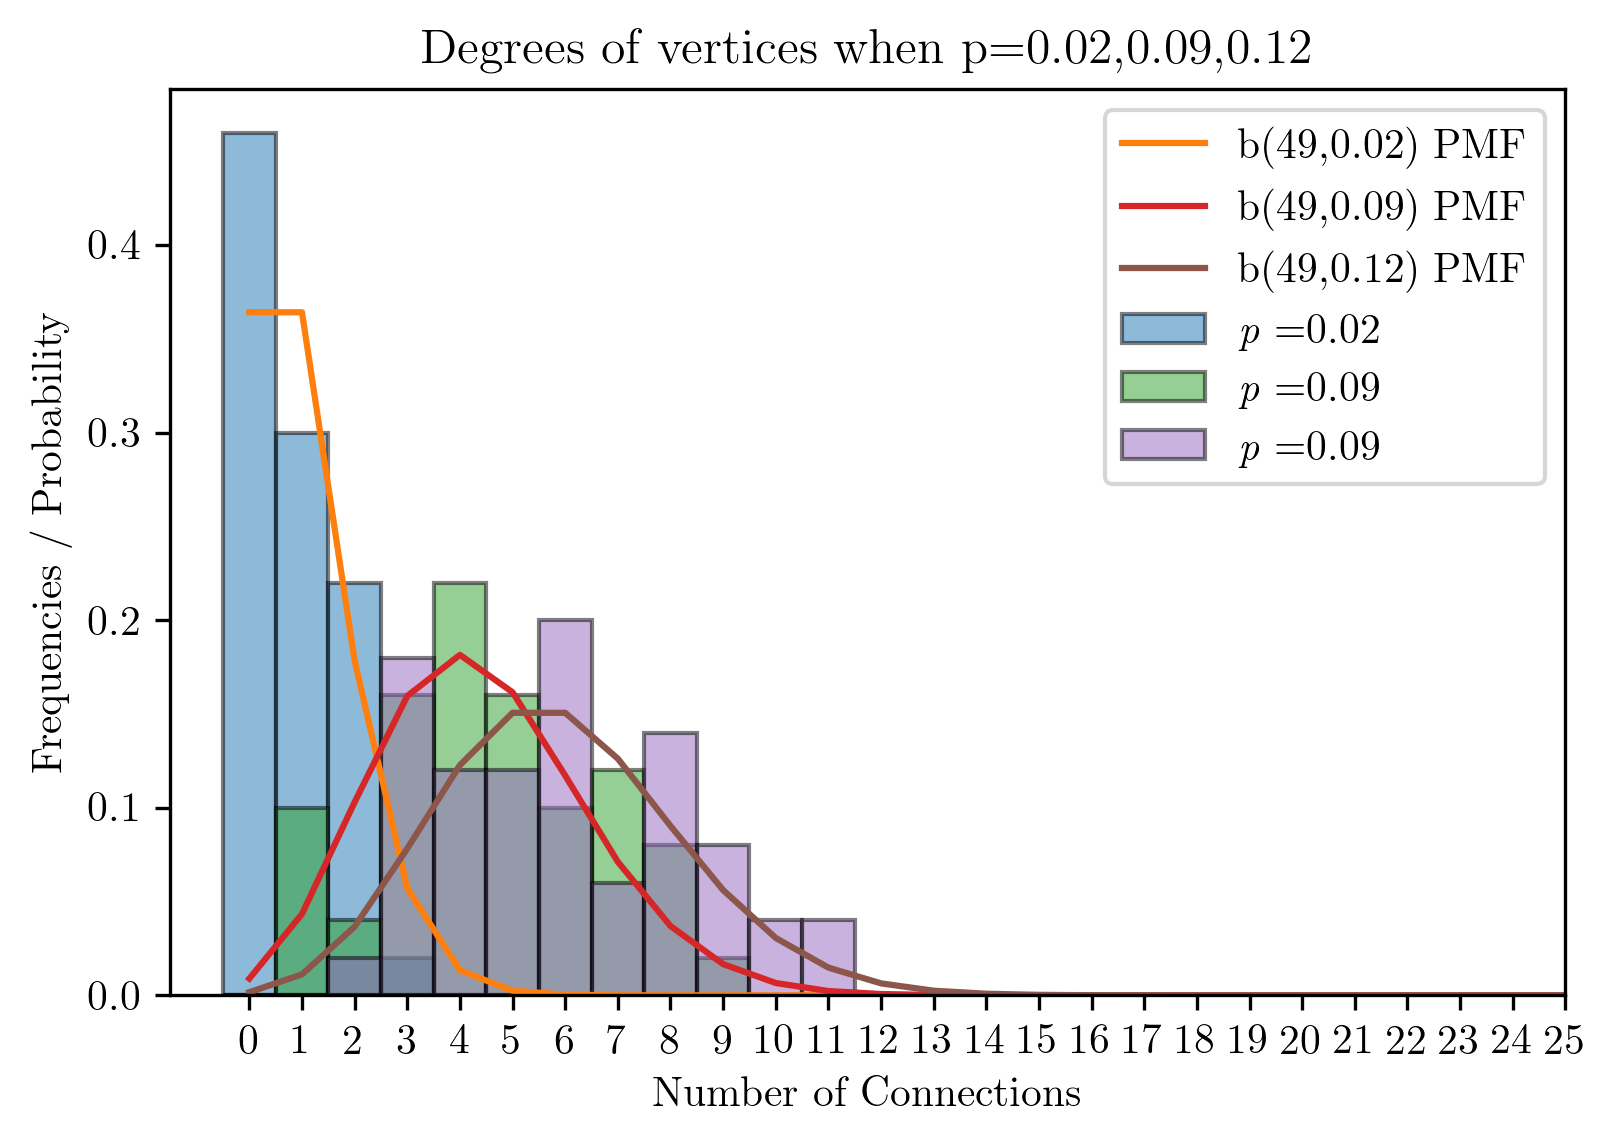

In [19]:
PMF = np.zeros([3,n])

for i in range(3):
    for k in range(n):
        PMF[i,k] = comb(n-1,k) * (p[i](1) ** k)*((1-p[i](1))**(n-k))

plt.figure(dpi = 300) 
plt.hist(degree[0,:], bins = range(52), rwidth = 1, edgecolor = 'black', \
         alpha = 0.5, label = '$\mathit{p=}0.02$',density = True) 
plt.plot(np.arange(0,50,1)+0.5,PMF[0,:],label = 'b(49,0.02) PMF')
plt.hist(degree[1,:], bins = range(52), rwidth = 1, edgecolor = 'black', \
         alpha = 0.5, label = '$\mathit{p=}0.09$',density = True) 
plt.plot(np.arange(0,50,1)+0.5,PMF[1,:],label = 'b(49,0.09) PMF')
plt.hist(degree[2,:], bins = range(52), rwidth = 1, edgecolor = 'black', \
         alpha = 0.5, label = '$\mathit{p=}0.09$',density = True) 
plt.plot(np.arange(0,50,1)+0.5,PMF[2,:],label = 'b(49,0.12) PMF')
plt.legend(loc='upper right')
plt.ylabel('Frequencies / Probability')
plt.xlabel('Number of Connections')
plt.title('Degrees of vertices when p={0.02,0.09,0.12}')
plt.xlim([-1,25])
_ = plt.xticks(np.arange(0,26,1)+0.5,[str(i) for i in range(0,26,1)])

### Q3

The degree of a vertex in network(n=100,p=0.06) is $b\left( 99,0.06 \right)$. Its expectation is therefore 5.94.

The histogram supports this conclusion.

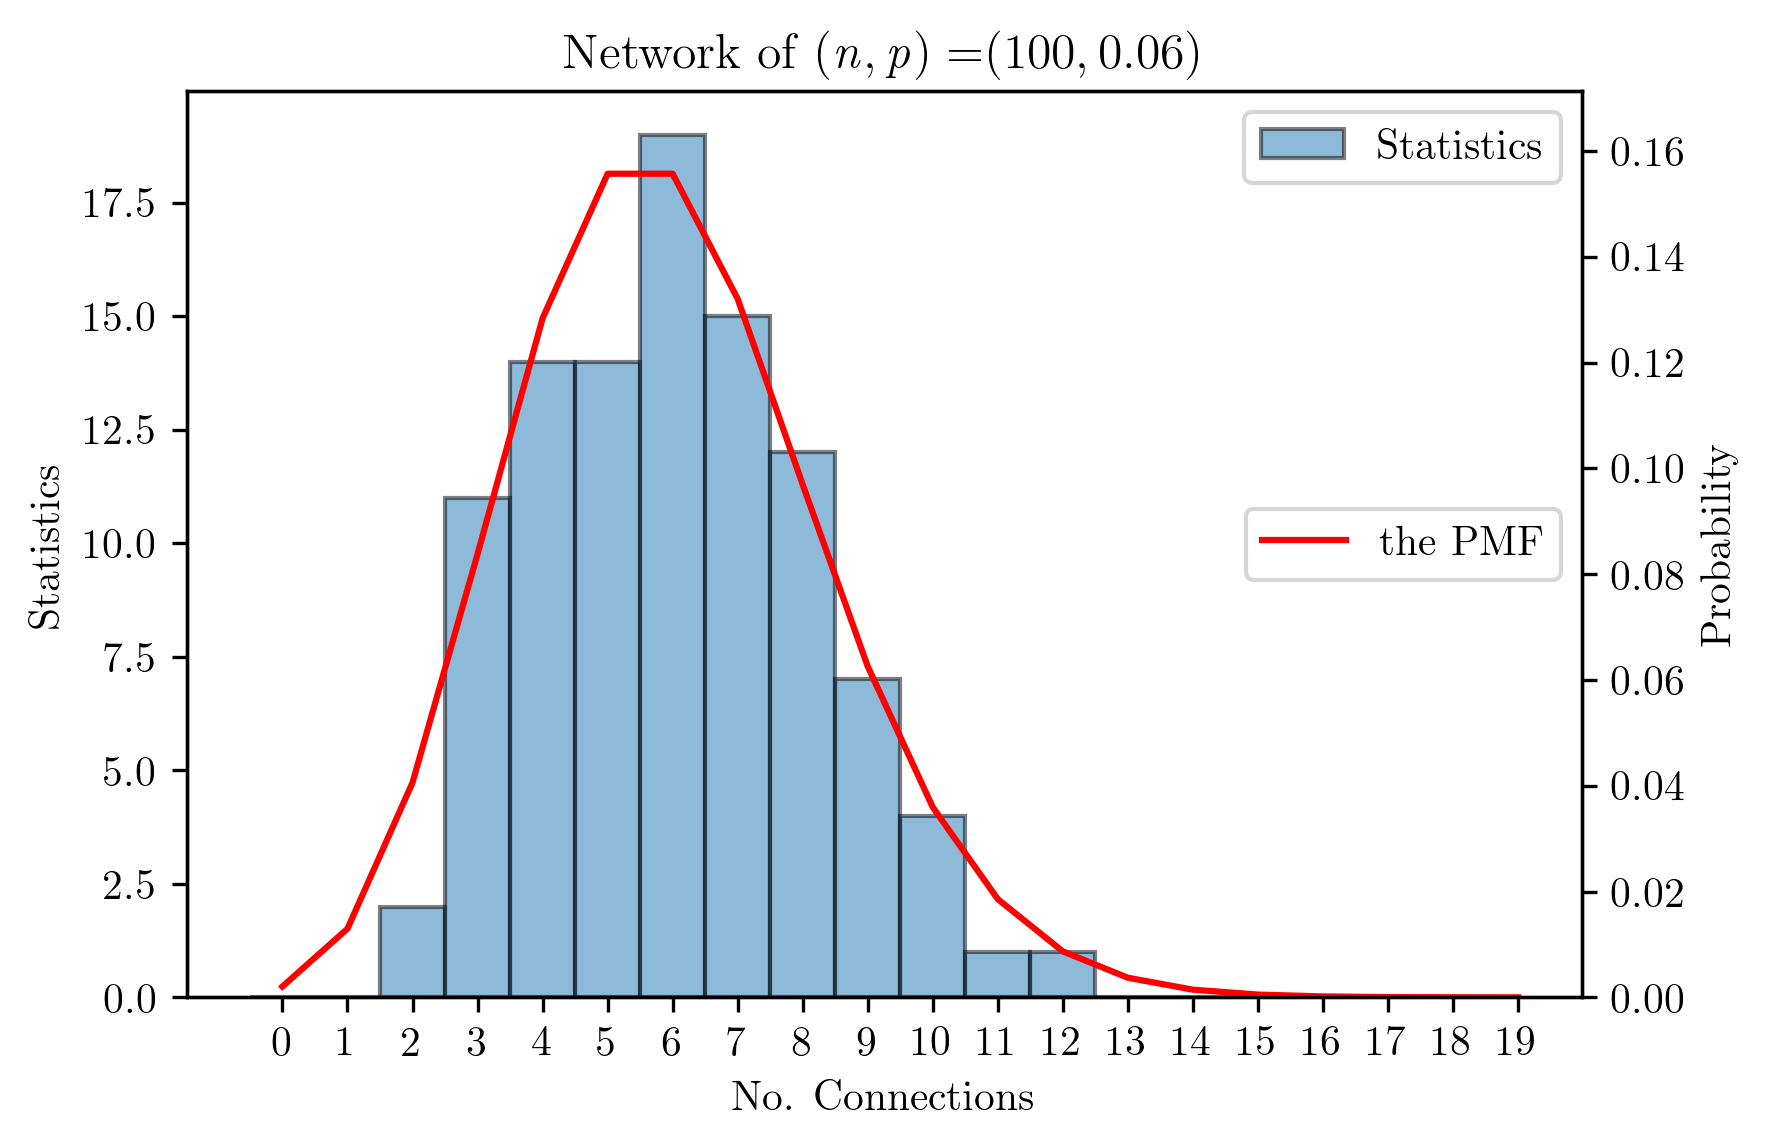

In [65]:
n2 = 100 # # of people
MaxC2 = n2 * (n2 - 1) / 2 # # of max connections

G2 = nx.Graph()

p = lambda x:0.06

for i in range(n2):
    for j in range(i+1,n2,1):
        if RejMethod(p,Uniform01,1,1) >=0.99 :
            G2.add_edge(i,j)
            
fx = np.zeros([20])
for k in range(20):
    fx[k] = comb(n2-1,k) * p(1) ** k * (1-p(1)) ** (n2-k)
#statistic
degree2 = np.zeros([n2])
for i in range(n2):
    degree2[i] = G2.degree[i]

# normalize degree into (0.2~1) 
# as the alphas of nodes
plt.figure(dpi = 300) 
cts,bins,_=plt.hist(degree2, bins = range(20), edgecolor = 'black', \
         alpha = 0.5, label = 'Statistics') 
plt.legend(loc='upper right')
plt.ylabel('Statistics')
plt.xlabel('No. Connections')
plt.title('Network of $\mathit{(n,p)=}(100,0.06)$')
_ = plt.xticks(np.arange(0,20,1)+0.5,[str(i) for i in range(0,20,1)])


ax2 = plt.twinx()
ax2.plot(np.arange(0,20,1)+0.5,fx,label = 'the PMF',c='r')
ax2.set_ylabel('Probability')
ax2.set_ylim([0,1*np.max(fx)*1.1])
ax2.legend(loc='center right')

## Exp.2 [Waiting]
--------------------------------------------

### Core Concepts

* Inverse CDF method

Let $X$ is a contineous random variable with CDF ${{F}_{X}}\left( x \right)$, then we cau use $x=F_{X}^{-1}\left( u \right)$ to get $X$'s observations, where $u$ are observations from uniform(0,1).


* Goodness of Fit

In this question we use Glivenko-Cantelli Test to evaluate the goodness of fit. Glivenko-Cantelli Test is also known as Glivenko-Cantelli Theorem. It states that the empirical distribution function defined as 
${{F}_{n}}\left( x \right)=\frac{1}{n}\sum\limits_{i=1}^{n}{{{I}_{\left( -\infty ,x \right]}}\left( x \right)}$
for random samples $X_i$, uniformly converges to the distribution $F_X \left(x\right)$. That is to say,$\sup \left| {{F}_{n}}\left( x \right)-{{F}_{X}}\left( x \right) \right|\to 0$ almost surely.


### Q1

$X$ is exponential distribution with parameter $\lambda=1/0.2=5$. After Glivenko-Cantelli Test, we get the upper bound 0.0133, which is close to zero.

In [21]:
from scipy.stats import chisquare

In [22]:
'''
F^-1(u) = -0.2ln(1-u), u is uniform(0,1)
'''
def invExp(u):
    #return x = F^-1(u)
    return -0.2 * np.log(1 - u)

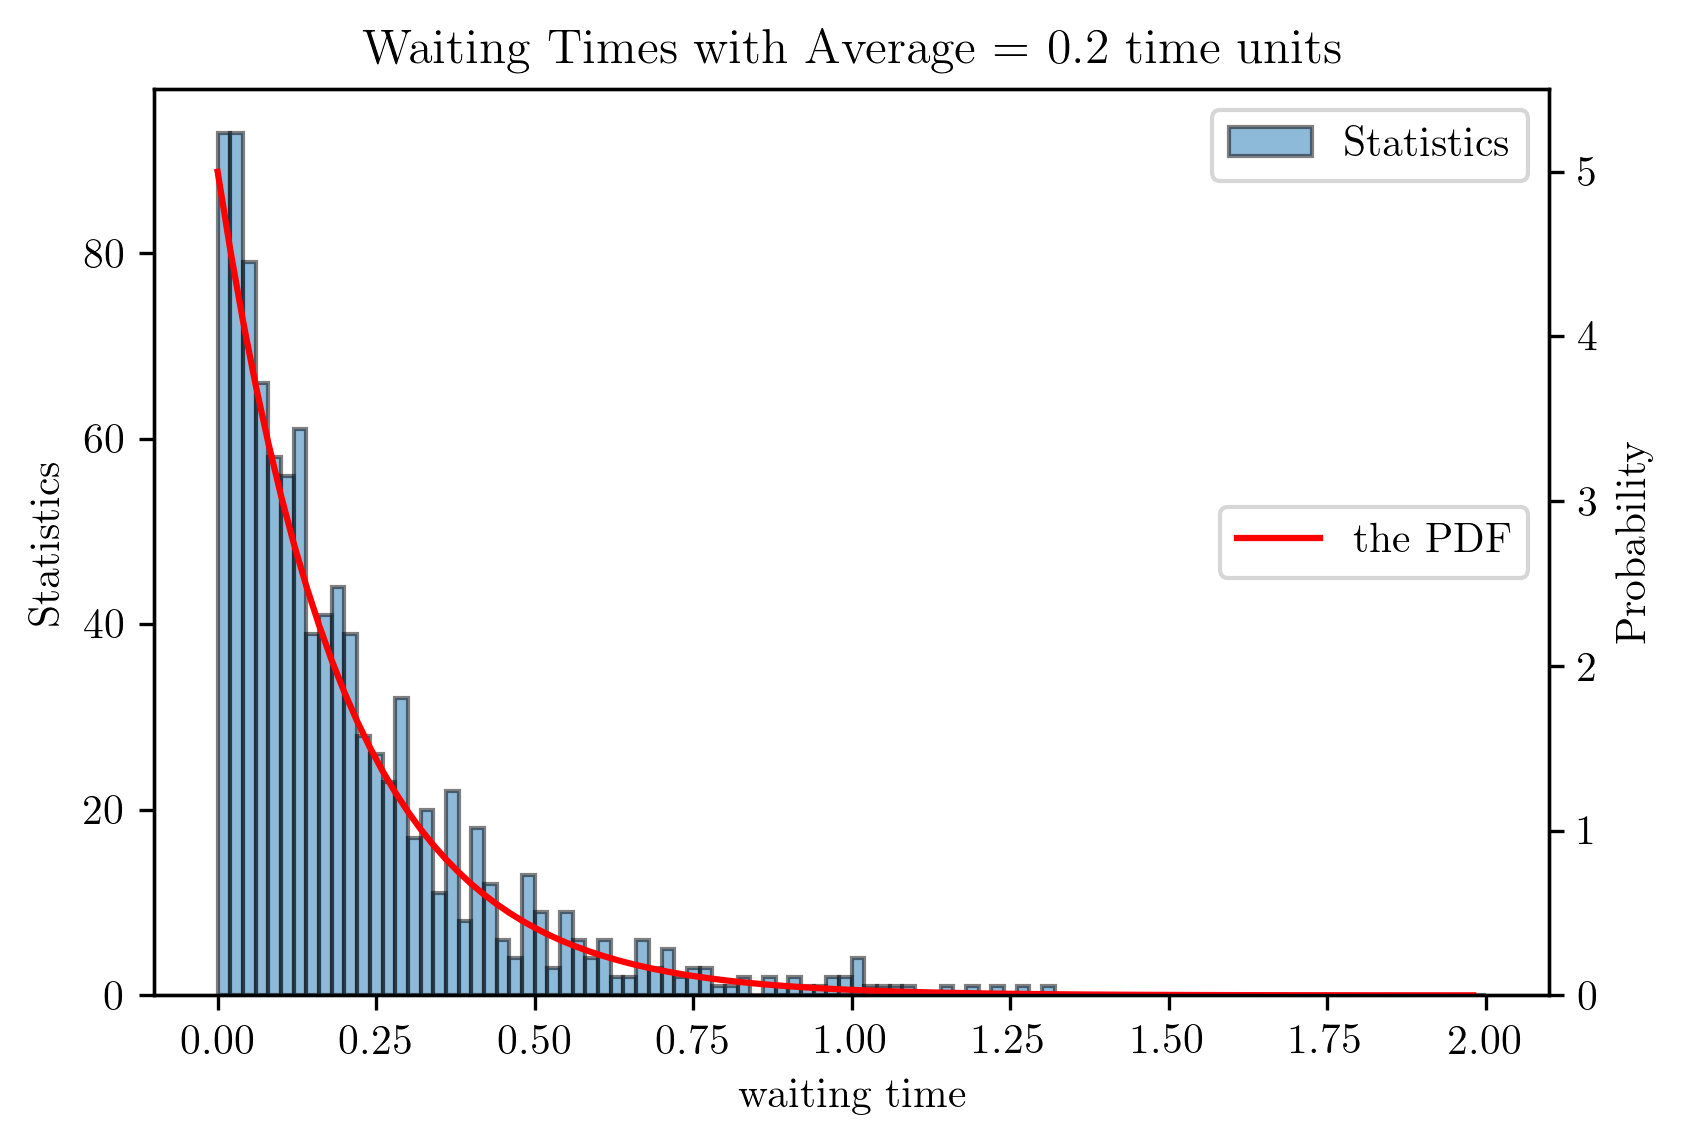

In [23]:
X = invExp(np.random.rand(1000))

plt.figure(dpi = 300) 
ctsExp,binsExp,_=plt.hist(X, bins = [i/50 for i in range(101)], edgecolor = 'black', \
         alpha = 0.5, label = 'Statistics',) 

Lambda = 5
x = np.arange(0,2.00,0.02)
fxExp = Lambda * np.exp(-Lambda*x)

plt.legend(loc='upper right')
plt.ylabel('Statistics')
plt.xlabel('waiting time')
plt.title('Waiting Times with Average = 0.2 time units')


ax2 = plt.twinx()
ax2.plot(x,fxExp,label = 'the PDF',c='r')
ax2.set_ylabel('Probability')
ax2.set_ylim([0,1*np.max(fxExp)*1.1])
ax2.legend(loc='center right')


${X}$ is exponential distribution with parameter $\lambda ={1}/{0.2}\;=5$. After Glivenko-Cantelli Test, we get the upper bound 0.0133, which is close to zero.

In [35]:
'''
 do Glivenko-Cantelli Test
'''
#Compute Fnx
Fn = np.zeros(ctsExp.shape)
Fn[0] = ctsExp[0]
for i in range(1,ctsExp.shape[0]):
    Fn[i] = Fn[i-1] + ctsExp[i]
Fn = Fn / np.sum(ctsExp)
#Computer Fx
Fx = 1 - np.exp(-Lambda*(x+0.02)) 
#Computer difference
dF = np.abs((Fn - Fx))
upperbound = np.max(dF)
print("upperbound =",upperbound)

upperbound = 0.0132820467106


### Core Concepts

* Pearson's Chi-squared Test

Partition $n$ observations from a population into $k$ mutually exclusive classes(bins) with respective number ${{O}_{i}}$ for $i=1,2,\ldots ,k$, and a null hypothesis gives the probability ${{p}_{i}}$ that an observation falls into the $i$th class. So we have its expected number ${E_i=np_i}$ for all $i$. Then we propose that, under the circumstance of the null hypothesis being correct, as $n$ goes to infinity, the limiting distribution of the quantity given by:

$${{X}^{2}}=\sum\limits_{i=1}^{k}{\frac{{{\left( {{O}_{i}}-{{E}_{i}} \right)}^{2}}}{{{E}_{i}}}}$$

is Chi-square distribution with $k-1$ degrees of freedom.

Let $\alpha$ be the significant level, then the confidence level is $p=1-\alpha$. Significance level indicates a risk of incorrectly rejecting the null hypothesis. If ${{X}^{2}}>\chi _{1-\alpha }^{2}\left( k-1 \right)$, we reject the null hypothesis, otherwise we fail to reject it (but also we cannot conclude that we can accept the null hypothesis). Another way is that, if ${p}'=\chi _{k-1}^{2}\left( {{X}^{2}} \right)<\alpha$, then we reject the null hypothesis, otherwise we fail to reject it (but also we cannot conclude that we can accept the null hypothesis).

Usually, a significant level of $\alpha=0.05$ works well.



* The relastionship between Exponential Distribution and Poisson Distribution

If random variable $X$ is $\text{Exp}\left( \lambda  \right)$, then the probality of exact k consecutive events $X_i$ happen in time interval $\left[0,t\right]$ is Poision Distribution $P\left( \lambda t \right)$. That is,
$$P\left[ \left( \sum\limits_{i=1}^{k}{{{X}_{i}}}\le t \right)\cap \left( \sum\limits_{i=1}^{k+1}{{{X}_{i}}}>t \right) \right]=\frac{{{e}^{-\lambda t}}{{\left( \lambda t \right)}^{k}}}{k!}$$


### Q2

As indicated above, the sum of $n$ independent $X$s is $P\left( \lambda t \right)$. 

The following result show that, under a significant level of 0.05, we fail to reject this hypothesis (p-value=1.0)

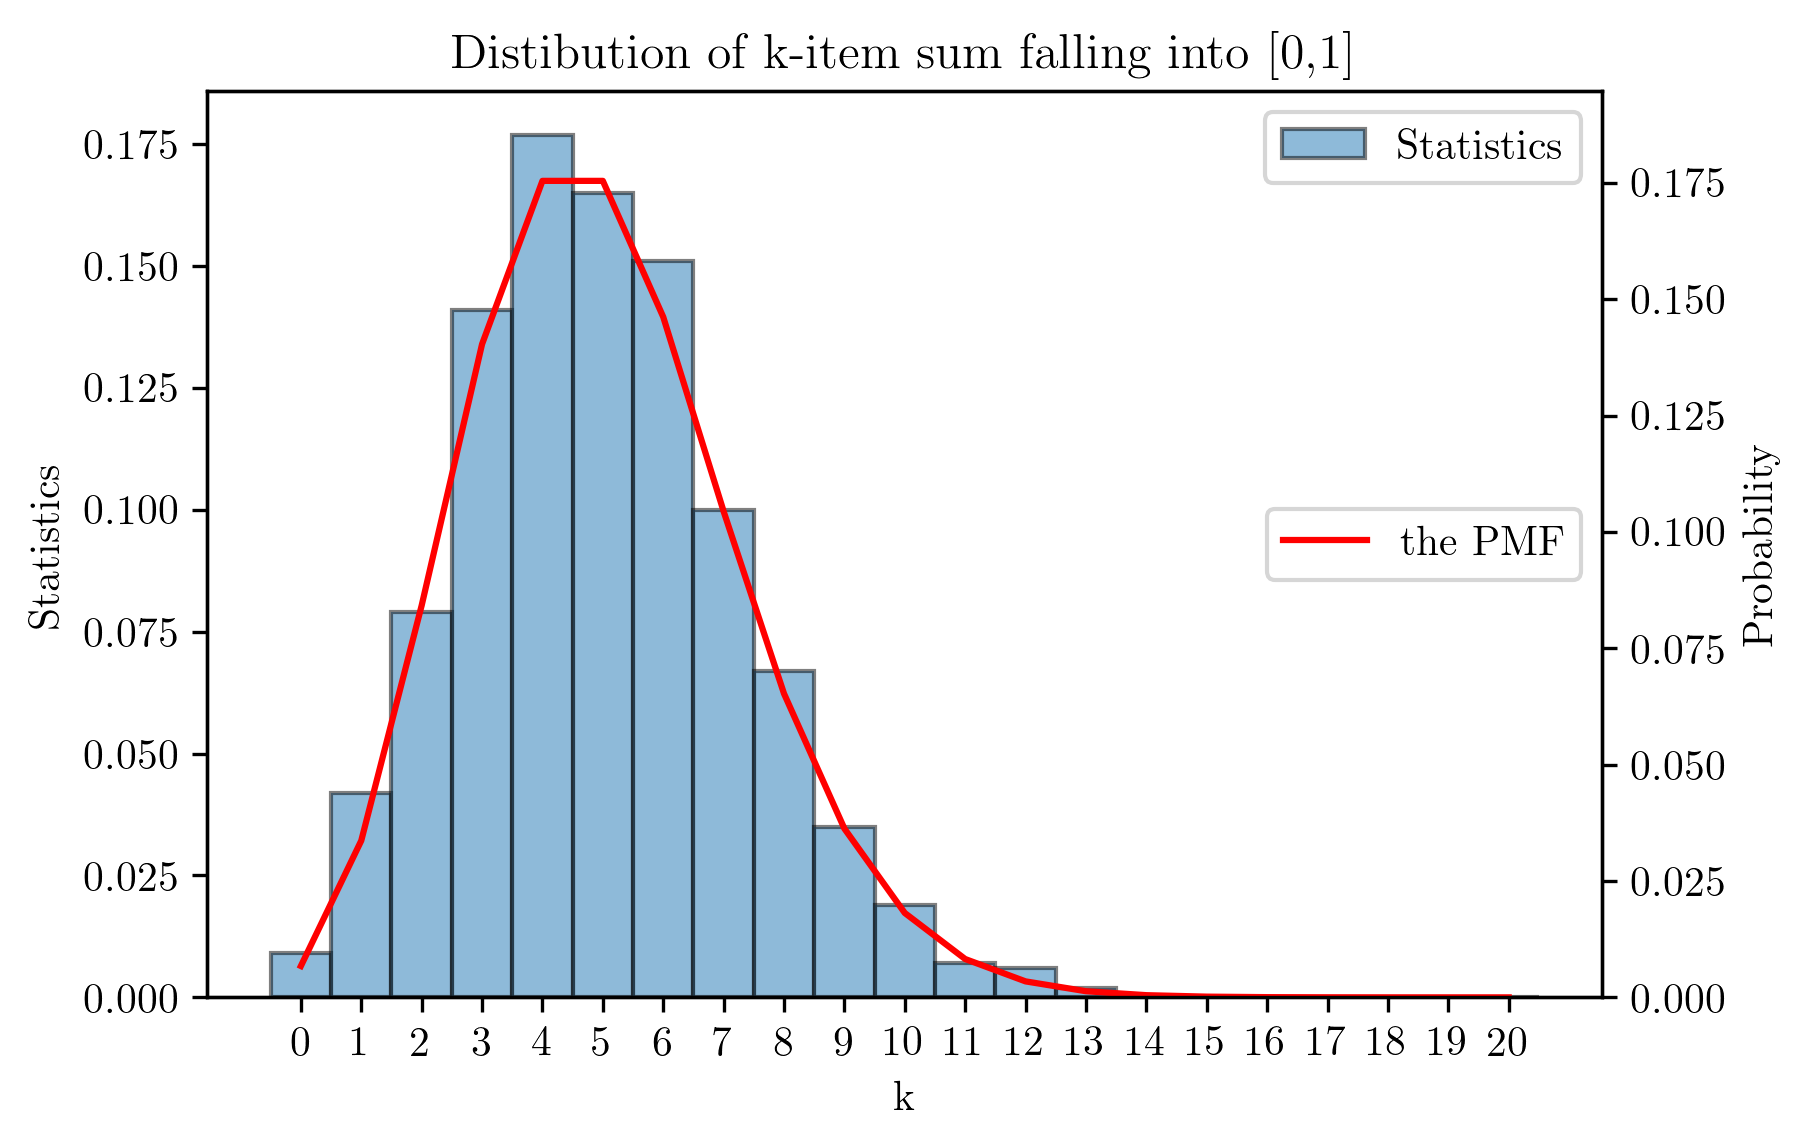

In [54]:
from scipy.stats import poisson

result = np.zeros([1000])
for i in range(1000):
    X = invExp(np.random.rand(100))
    Sum = np.zeros([1])
    for j in range(100):
        Sum += X[j]
        if Sum > 1:
            result[i] = j
            break
        else:
            if j == 99:
                result[i] = 100
            continue

            
px = np.zeros([21])

for i in range(21):
    px[i] = poisson.pmf(i,Lambda*1)

plt.figure(dpi=300)
data_2,fx_2,_=plt.hist(result, bins = np.arange(0,22,1), edgecolor = 'black', \
         alpha = 0.5, label = 'Statistics',density=True) 
plt.legend(loc='upper right')
plt.ylabel('Statistics')
plt.xlabel('k')
plt.title('Distibution of k-item sum falling into [0,1]')
_ = plt.xticks(np.arange(0,21,1)+0.5,[str(i) for i in np.arange(0,21,1)])


ax2 = plt.twinx()
ax2.plot(np.arange(21)+0.5,px,label = 'the PMF',c='r')
ax2.set_ylabel('Probability')
ax2.set_ylim([0,1*np.max(data_2)*1.1])
ax2.legend(loc='center right')

The p-value of chi-square test is 1.0. Fail to reject the null hypothesis.

In [57]:
'''
Pearson's Chi-squared Test

'''
from scipy.stats import chisquare
chisquare(data_2,px)


Power_divergenceResult(statistic=0.00740148304332816, pvalue=1.0)

## Exp.3 [Double Dejection]
--------------------------------------------

### Core Concepts

* Rejection Method

Rejection Method is a useful method to generate samples from a distribution we need, denoted its density function as $f\left( x \right)$, which is hard to obtain observations by another easy-to-generate distribution, denoted its density function as $g\left( x \right)$. We use formula $U\le \frac{f\left( x \right)}{cg\left( x \right)}$ to accept the observation if it is true. $U$ is a random value generated from uniform(0,1), and $x$ is generated from $g\left( x \right)$. $\left| \frac{f(x)}{g\left( x \right)} \right|$ should be bounded within $c>1$ and it is better for $c$ to be close to $1$.


In [62]:
from scipy.stats import beta
Beta_8_5 = beta(8,5)

In [63]:
def bimodal(x):
    if type(x).__module__ != np.__name__:
        x = np.array([x])
        
    y = np.zeros(np.shape(x))
    y[np.where((x>0) & (x<=1))] = 0.5*\
        Beta_8_5.pdf(x[np.where((x>0) & (x<=1))])
    y[np.where((x>4) & (x<=5))] = 0.5*\
        (x[np.where((x>4) & (x<=5))]-4)
    y[np.where((x>5) & (x<=6))] = -0.5*\
        (x[np.where((x>5) & (x<=6))]-6)
    return y

In [64]:
def g1(x = None):
    if x is not None:
        if type(x).__module__ != np.__name__:
            x = np.array([x])
        y = 999*np.ones(np.shape(x))
        y[np.where((x>0) & (x<=1))] = 1/3
        y[np.where((x>4) & (x<=6))] = 1/3
    else:
        x = np.random.rand() * 3
        x = x if x <= 1 else x + 3
        return x
    return y

### Selection of g(x)

$g\left( x \right)$ we choose in this question is uniform((0,1),(4,6)). Its pdf is:
$$g\left( x \right)=\left\{ \begin{matrix}
   {}^{1}/{}_{3} & x\in \left[ 0,1 \right]\cup \left[ 4,6 \right]  \\
   0 & \text{otherwise}  \\
\end{matrix} \right.$$

The maximum of $Beta\left( 8,5 \right)$ is $M\approx1.4631$.And because 1.4631>0.5, the maximum of $f\left( x \right)$ in [4,6], the scale $c$ is therefore ${}^{M}/{}_{\left( {1}/{3}\; \right)}\approx 4.3894$.

### Rejection Rate in Theory

The rejection rate in theory is:

$$1-\frac{1}{c}=1-\frac{1}{4.3894}=0.7722$$

We will see the result support the conclusion well.

### Rejection Area

As the following figure shows. The area swiped by the red line is the rejection are. The area ratio of rejection area and cg(x) covering is rejection rate since cg(x) envelopes f(x).

Text(0.5,1,'Graph of Rejection Sampling')

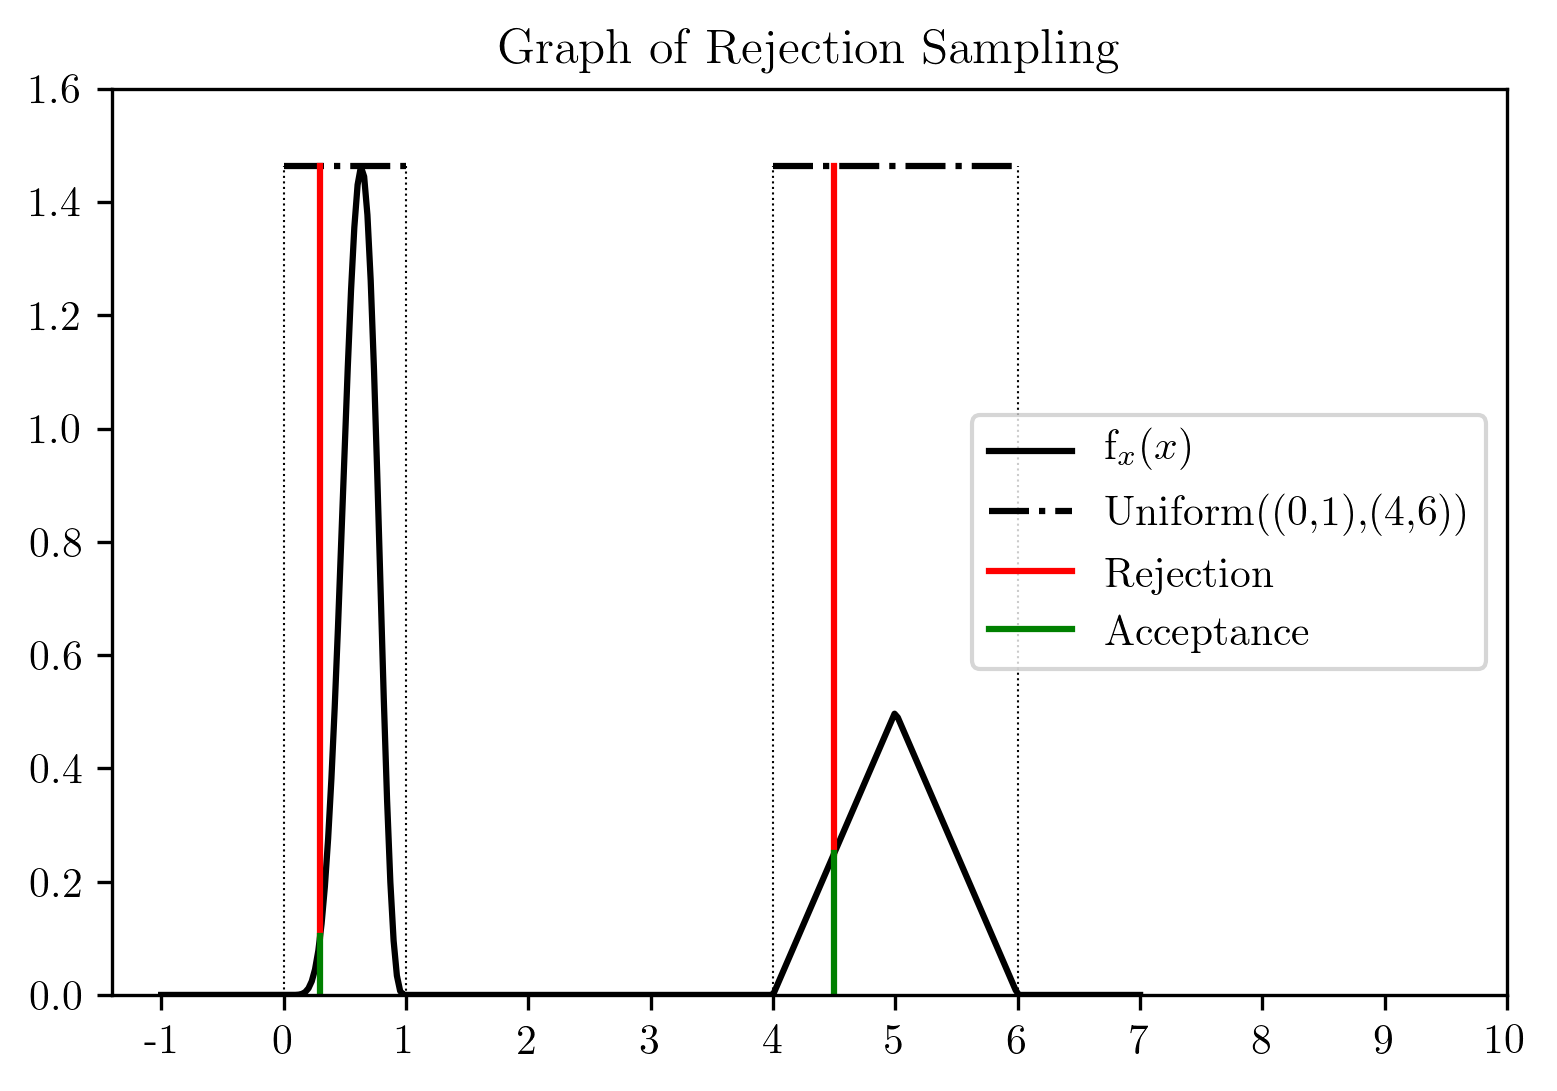

In [65]:
x = np.linspace(-1,7,300)
M = 1.4630928869683126
plt.figure(dpi=300)
plt.plot(x,bimodal(x),'k',label = '&\mathit{f_x (x)}&')
plt.plot([0,0],[0,M],'k:',linewidth = 0.5)
plt.plot([0,1],[M,M],'k-.')
plt.plot([1,1],[M,0],'k:',linewidth = 0.5)
plt.plot([4,4],[0,M],'k:',linewidth = 0.5)
plt.plot([6,6],[0,M],'k:',linewidth = 0.5)
plt.plot([4,6],[M,M],'k-.',label = 'Uniform((0,1),(4,6))')
plt.plot([0.3,0.3],[bimodal(0.3),M],'r',label = 'Rejection')
plt.plot([0.3,0.3],[bimodal(0.3),0],'g',label = 'Acceptance')
plt.plot([4.5,4.5],[bimodal(4.5),M],'r')
plt.plot([4.5,4.5],[bimodal(4.5),0],'g')
plt.ylim([0,1.6])

plt.xticks(range(-1,11,1),[str(i) for i in range(-1,11,1)])
plt.legend(loc='best')
plt.title('Graph of Rejection Sampling')

Region 1 refers to [0,1]

Region 2 refers to [4,5]

Region 3 refers to [5,6]

Region 4 refers to otherwise.

So that rejection rate on Region 1 union Region 2 union Region 3 is the overall rejection rate. And it is should close to the theoretical one we derived above.

From the figure above, we see that the rejection area on Region 2 and Region 3 accounts more for the area that cg(x) convers on [4,6], therefore the rejection rate on Region 2 and Region 3 should be higher than that on Region 1. Also, the rejection rate on Region 2 should be equal to (empirically close to) that on Region 3.

The rejection rate on Region 4 is undoubtedly ONE. Nice.

We see that the empirical rejection rate is corresponding well to the theoretical rejection rate well. 

In [117]:
Cts = 1000
x = np.random.rand(Cts)*8-1 # uniform[-1,7)

env1 = np.where((x>0) & (x<=1))[0]
env2 = np.where((x>4) & (x<=5))[0]
env3 = np.where((x>5) & (x<=6))[0]
env4 = np.where((x<=0) | ((x>1) & (x<=4)) | (x>6))[0]

result = np.zeros([Cts])
M = 1.4630928869683126 * 3 # max of Beta85 / 2 / 3

result = (np.random.rand(Cts) <= bimodal(x) / (M * g1(x))).astype('int32')
rr1 = 1 - np.sum(result[env1]) / np.shape(env1)[0]
rr2 = 1 - np.sum(result[env2]) / np.shape(env2)[0]
rr3 = 1 - np.sum(result[env3]) / np.shape(env3)[0]
rr4 = 1 - np.sum(result[env4]) / np.shape(env4)[0]
rr23 = 1 - (np.sum(result[env3])+np.sum(result[env2])) \
    / (np.shape(env3)[0]+np.shape(env2)[0])
rr123 = 1 - (np.sum(result[env3])+np.sum(result[env2])+np.sum(result[env1]))\
    / (np.shape(env3)[0]+np.shape(env2)[0]+np.shape(env1)[0])
print("Rejection rate in Region 1 is",rr1)
print("Rejection rate in Region 2 is",rr2)
print("Rejection rate in Region 3 is",rr3)
print("Rejection rate in Region 2 and 3 is",rr23)
print("Rejection rate in Region 1,2 and 3 is",rr123)
print("Overall Rejection rate theoretically is", 1-1/M)
print("Rejection rate in Region 4 is",rr4)


Rejection rate in Region 1 is 0.655513854508
Rejection rate in Region 2 is 0.827807053101
Rejection rate in Region 3 is 0.830897036505
Rejection rate in Region 2 and 3 is 0.829363482739
Rejection rate in Region 1,2 and 3 is 0.771115926907
Overall Rejection rate theoretically is 0.7721721318568938
Rejection rate in Region 4 is 1.0
